In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors

In [10]:
### 1 - Open Optimisation File ###
# Training period (0-1600) normalised-RMSE (CV - cross validaiton mode)
# Test period (1601-1850) N-RMSE
# Solution list (list of lag times and selections by variable)


In [12]:
name='Output/optimisation_output.csv'
sol_file_av = pd.read_csv(name, index_col=None, sep=' ', header=0)    
num_sims=sol_file_av.shape[0]
print (sol_file_av)
print ("Number of optimisaiton evaluations: ", sol_file_av.shape[0])

            CV      Test                                                Sol
0     1.088377  1.102080  [5 5 2 4 4 5 2 4 7 7 7 4 7 5 1 1 4 5 1 6 1 6 1...
1     1.071155  1.029921  [4 7 4 3 5 2 7 4 1 1 4 2 3 1 1 1 1 1 7 3 4 3 2...
2     1.067837  1.047352  [7 6 7 4 1 4 6 5 3 5 2 6 3 6 1 6 4 1 5 4 4 3 6...
3     1.075673  1.041193  [7 4 1 3 2 6 6 2 1 7 6 5 1 1 3 5 7 2 3 5 3 1 1...
4     1.071115  1.056015  [1 1 3 5 7 1 4 2 4 2 1 7 5 6 1 5 2 1 6 4 2 4 6...
...        ...       ...                                                ...
4079  0.987905  1.015085  [2. 3. 3. 4. 3. 3. 4. 5. 2. 3. 2. 3. 5. 2. 2. ...
4080  0.987905  1.015085  [2. 3. 3. 4. 3. 3. 4. 5. 2. 3. 2. 3. 5. 2. 2. ...
4081  1.084798  1.090332  [1 5 6 4 5 7 6 1 6 7 3 7 1 6 1 1 1 5 3 1 3 4 1...
4082  0.989232  1.011767  [3. 3. 3. 4. 4. 3. 3. 5. 2. 3. 2. 3. 5. 2. 2. ...
4083  0.988524  1.004562  [3. 3. 3. 4. 4. 2. 3. 5. 2. 3. 2. 3. 5. 2. 2. ...

[4084 rows x 3 columns]
Number of optimisaiton evaluations:  4084


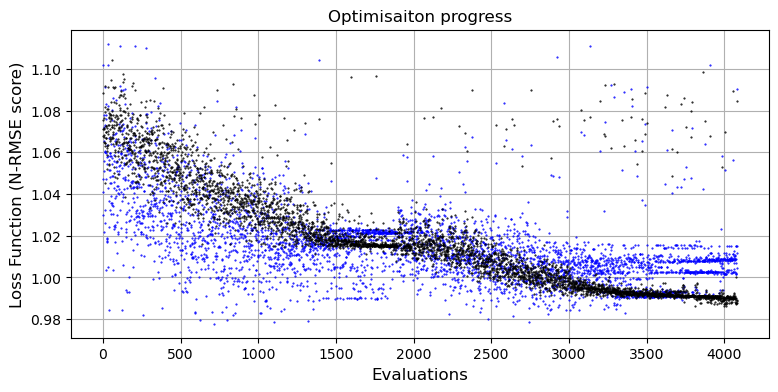

In [15]:
# Plot loss functions during evaluation process 
plt.figure(figsize=(9,4))
plt.plot(sol_file_av.index,sol_file_av['Test'],'b',marker='o',ms=0.5,lw=0)
plt.plot(sol_file_av.index,sol_file_av['CV'],'k',marker='o',ms=0.5,lw=0)

plt.title("Optimisaiton progress")
plt.xlabel('Evaluations',fontsize=12)

plt.ylabel('Loss Function (N-RMSE score)',fontsize=12)
#plt.ylim([0,1])
plt.grid()

plt.show()

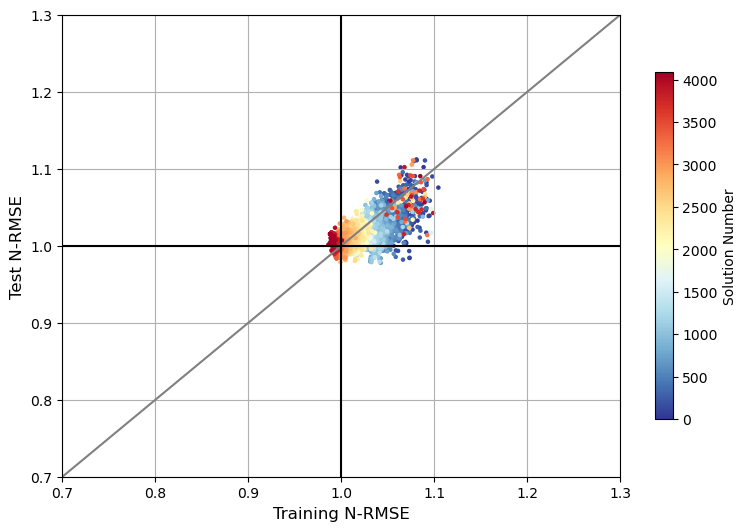

In [23]:
# Plot scatter plot to identify overfitting

plt.figure(figsize=(9,6))
plt.scatter(sol_file_av['CV'],sol_file_av['Test'],c=range(num_sims),s=5,alpha=1,cmap='RdYlBu_r')

cbar=plt.colorbar(label="Solution Number",shrink=0.75)
cbar.ax.tick_params(labelsize=10)

plt.plot([0,2],[0,2],ls='-', color='grey')
plt.axhline(y=1,ls='-',lw=1.5,color='black')
plt.axvline(x=1,ls='-',lw=1.5,color='black')

plt.xlabel("Training N-RMSE",fontsize=12)
plt.ylabel("Test N-RMSE",fontsize=12)
plt.xlim([0.7,1.3])
plt.ylim([0.7,1.3])

plt.grid()
plt.show()

In [ ]:
# Add best solution #